In [1]:
#Loading some libraries
%matplotlib inline
#%matplotlib ipympl
%load_ext autoreload
%autoreload 2
from pylab import *
import numpy as np
import pandas as pd
import glob
import pandas as pd
def smooth(ser, sc):
    return np.array(pd.Series(ser).rolling(sc, min_periods=1, center=True).mean())

In [2]:
observed_data = ["dataSMUspeed_position_RT.tsv"]
observed_data=glob.glob("../data/HU/*.tsv")
rdp_on_uniform = "../data/Mockv9_multi_uni_RDPv27.tsv"
theoretical_speeds = "../data/parameters_v9_uniform_multi.txt"
rdp_speed="spedd.rdp"
resolution_th_speed=50
n_component_final=3
n_average=5
delta=100 # in bp/min to model p(true_speed|rdp_speed)

In [3]:
exp_list={}
for data in observed_data:
    exp_list[data[:-4]]=pd.read_csv(data,sep="\t")

In [4]:
rdp = pd.read_csv(rdp_on_uniform,sep="\t")
rdp

,read_id,spedd.rdp
0,596c2eaa-c54c-444d-a542-16fc2fbb2c72,2600
1,41ee1f5a-6924-4a11-9c38-9ce5c01bd2c6,1950
2,7c636ceb-8d2e-46b6-9b2a-99f1441deaef,1700
3,0e08e2fa-b64b-4149-8fd4-6db3c60f69bb,1650
4,00f7486f-818b-47a1-a8a3-25992e98878f,650
...,...,...
61267,a6d88e2e-ba3f-4f32-a814-205b93583576,2250
61268,ceedcd4d-1080-44a0-bfe1-190a9a10dc97,3300
61269,18147278-4014-404d-a070-5dd567716b7e,800
61270,9a43e986-040e-47d9-92ac-650518b01cd0,1000


In [5]:
import ast
true_speed ={}
with open(theoretical_speeds,"r") as f:
    for l in f.readlines():
        key , *dictp = l.split(" ")
        dictp= ast.literal_eval(" ".join(dictp))
        #(key,dictp["speed_th"])
        true_speed[key]=dictp["speed_th"]
       # break
combined = rdp
combined["true_speed"] =[true_speed[idd] for idd in rdp["read_id"] ]
combined

,read_id,spedd.rdp,true_speed
0,596c2eaa-c54c-444d-a542-16fc2fbb2c72,2600,3786.638367
1,41ee1f5a-6924-4a11-9c38-9ce5c01bd2c6,1950,2120.943570
2,7c636ceb-8d2e-46b6-9b2a-99f1441deaef,1700,1609.716982
3,0e08e2fa-b64b-4149-8fd4-6db3c60f69bb,1650,2232.964924
4,00f7486f-818b-47a1-a8a3-25992e98878f,650,847.006167
...,...,...,...
61267,a6d88e2e-ba3f-4f32-a814-205b93583576,2250,2826.819402
61268,ceedcd4d-1080-44a0-bfe1-190a9a10dc97,3300,3038.329882
61269,18147278-4014-404d-a070-5dd567716b7e,800,666.754506
61270,9a43e986-040e-47d9-92ac-650518b01cd0,1000,446.902027


Text(0, 0.5, 'RDP speed')

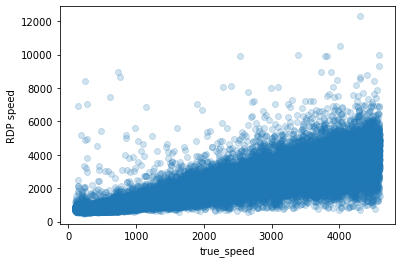

In [6]:
plot(combined["true_speed"],combined[rdp_speed],"o",alpha=0.2)
xlabel("true_speed")
ylabel("RDP speed")

../data/HU/BT16_5MMHU_RDPv27speed 4220
../data/HU/BT2_50HU_refS288Cr_RDPv27speed 1663
../data/HU/BT16_2.5MMHU_RDPv27speed 4916
../data/HU/BT16_1MMHU_RDPv27speed 3650
../data/HU/FS_RDPv27speed 3705
../data/HU/JP3A_refS288Cr_RDPv27speed 407
../data/HU/BT1_refS288Cr_RDPv27speed 4001
../data/HU/BT16_10MMHU_RDPv27speed 4461
../data/HU/BT12_BT1_RDPv27speed 748
../data/HU/FR_RDPv27speed 4554
../data/HU/BT16_0HU_RDPv27speed 1185
../data/HU/BT15_BT1_RDPv27speed 1255
../data/HU/FU_RDPv27speed 3078
../data/HU/BT13_BT1_RDPv27speed 1518
../data/HU/FT_RDPv27speed 3066
../data/HU/BT16_25MMHU_RDPv27speed 5474
../data/HU/BT2_0HU_refS288Cr_RDPv27speed 2881
../data/HU/BT2_200HU_refS288Cr_RDPv27speed 137
../data/HU/EW_refS288Cr_RDPv27speed 1274
../data/HU/BT2_100HU_refS288Cr_RDPv27speed 915
../data/HU/BT2_25HU_refS288Cr_RDPv27speed 2542


<ipython-input-7-c9895c5036f0>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()


../data/HU/FV_RDPv27speed 2498
../data/HU/DQ_refS288Cr_RDPv27speed 5921
../data/HU/BT14_BT1_RDPv27speed 1661
../data/HU/FK_refS288Cr_RDPv27speed 1026
../data/HU/BT10_100UM_RDPv27speed 541


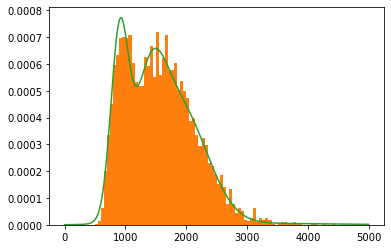

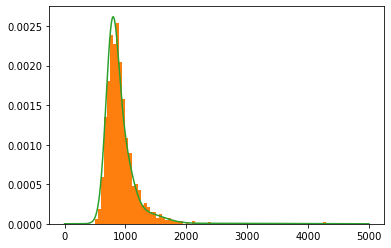

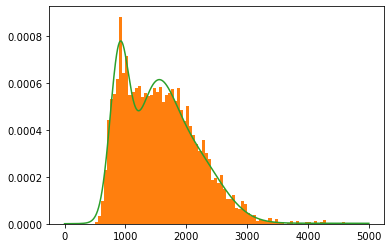

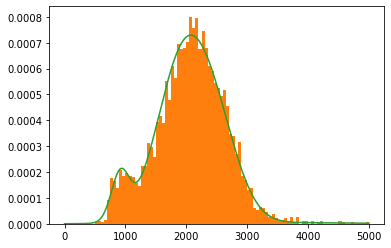

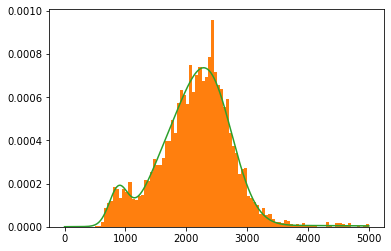

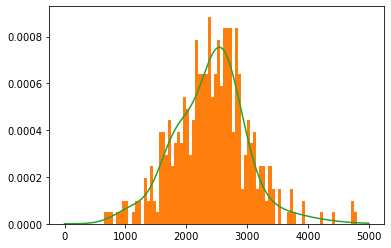

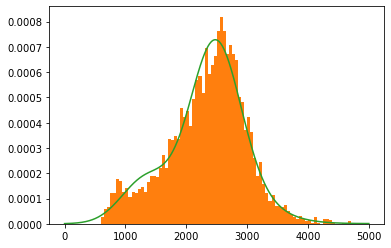

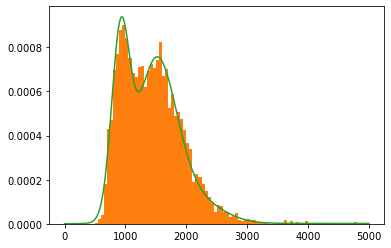

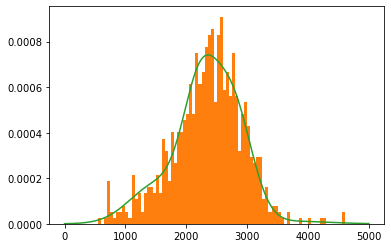

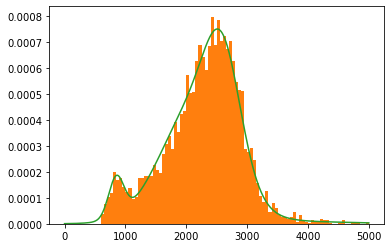

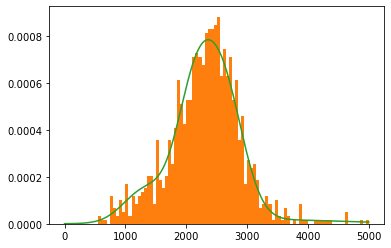

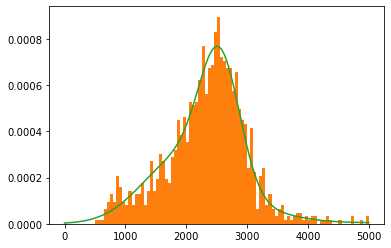

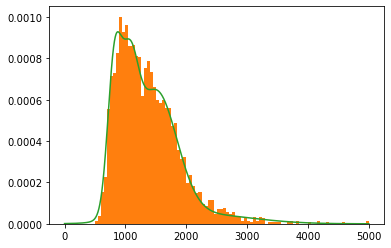

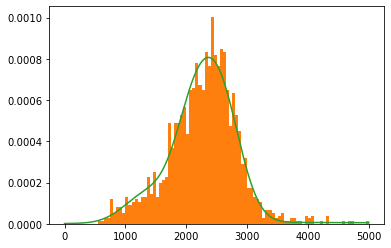

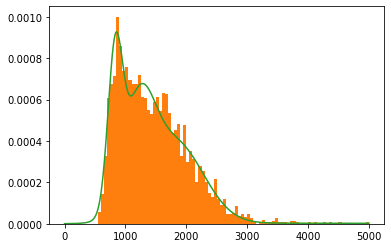

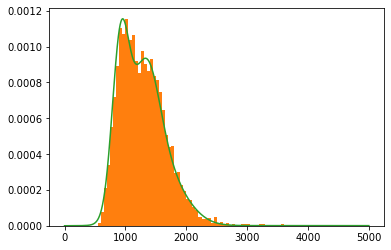

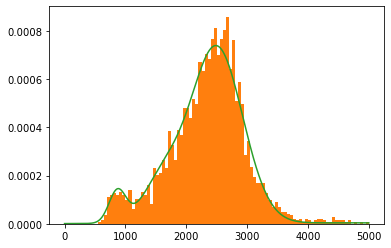

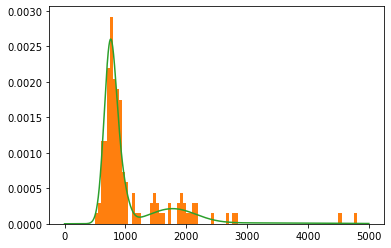

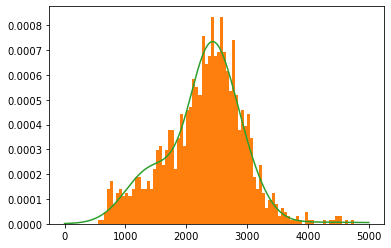

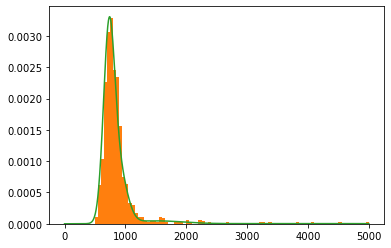

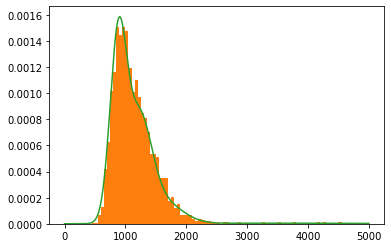

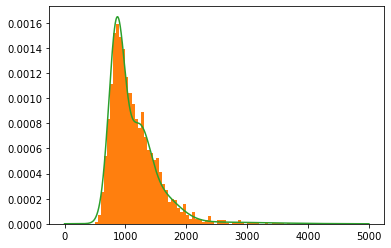

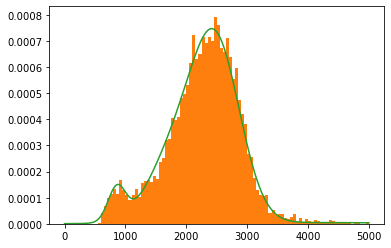

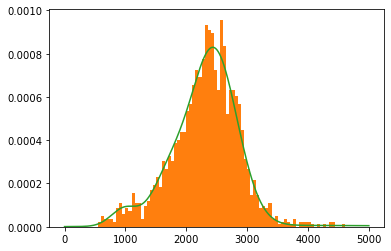

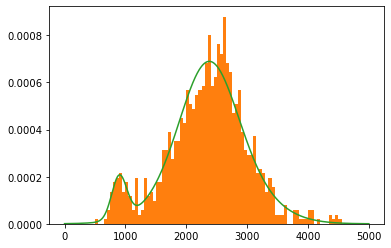

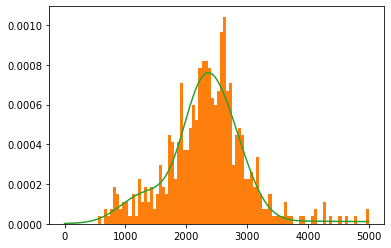

In [7]:
import pomegranate
from pomegranate import GeneralMixtureModel,NormalDistribution
for expn,exp in exp_list.items():
    print(expn,len(exp))
    figure()
    hist(exp.speed,bins=100,range=[0,5000],density=True);
    nc=4
    if len(exp)<100:
        nc=2

    init = GeneralMixtureModel.from_samples(NormalDistribution, n_components=nc,
                                    X=np.array(exp.speed)[:,np.newaxis],
                                            n_jobs=6)
    hist(exp.speed,bins=100,range=[0,5000],density=True);
    r=np.arange(0,5000)
    plot(r,init.probability(r[:,np.newaxis]))

In [8]:
from pomegranate import GeneralMixtureModel,NormalDistribution
class frozenGeneralMixtureModel(GeneralMixtureModel):
    def __init__(self, gm):
        super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
                                                   weights=np.exp(gm.weights))
    def from_summaries(self,*args,**kwargs):
        return self
    


In [9]:
weights_lists={expn:[] for expn in exp_list.keys()}
tofit50 = {expn:[] for expn in exp_list.keys()}
#hist(rdp_final,range=[0,5000],bins=100,density=True,label="drawed rdp");
#figure()
centers = list(range(100,4500,resolution_th_speed))
r=list(range(0,5000,100))
for average in range(n_average):
    probas = {}
    for center in centers:
        sample=combined[rdp_speed][ (combined["true_speed"]<center+delta) & (combined["true_speed"]>center-delta) ]

        while center not in probas or np.any(np.isnan(probas[center].probability(r))):
            probas[center] = frozenGeneralMixtureModel(GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
                                        X=np.array(sample)[:,np.newaxis],
                                                n_jobs=1))
    
    for expn in exp_list.keys():
        print(expn)
        tofit50[expn]=GeneralMixtureModel([probas[center] for center in centers])
        tofit50[expn].fit(np.array(exp_list[expn].speed)[:,np.newaxis]);

        weights=np.exp(tofit50[expn].weights)
        weights_lists[expn].append(weights)

<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.d

../data/HU/BT16_5MMHU_RDPv27speed
../data/HU/BT2_50HU_refS288Cr_RDPv27speed
../data/HU/BT16_2.5MMHU_RDPv27speed
../data/HU/BT16_1MMHU_RDPv27speed
../data/HU/FS_RDPv27speed
../data/HU/JP3A_refS288Cr_RDPv27speed
../data/HU/BT1_refS288Cr_RDPv27speed
../data/HU/BT16_10MMHU_RDPv27speed
../data/HU/BT12_BT1_RDPv27speed
../data/HU/FR_RDPv27speed
../data/HU/BT16_0HU_RDPv27speed
../data/HU/BT15_BT1_RDPv27speed
../data/HU/FU_RDPv27speed
../data/HU/BT13_BT1_RDPv27speed
../data/HU/FT_RDPv27speed
../data/HU/BT16_25MMHU_RDPv27speed
../data/HU/BT2_0HU_refS288Cr_RDPv27speed
../data/HU/BT2_200HU_refS288Cr_RDPv27speed
../data/HU/EW_refS288Cr_RDPv27speed
../data/HU/BT2_100HU_refS288Cr_RDPv27speed
../data/HU/BT2_25HU_refS288Cr_RDPv27speed
../data/HU/FV_RDPv27speed
../data/HU/DQ_refS288Cr_RDPv27speed
../data/HU/BT14_BT1_RDPv27speed
../data/HU/FK_refS288Cr_RDPv27speed
../data/HU/BT10_100UM_RDPv27speed


<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.d

../data/HU/BT16_5MMHU_RDPv27speed
../data/HU/BT2_50HU_refS288Cr_RDPv27speed
../data/HU/BT16_2.5MMHU_RDPv27speed
../data/HU/BT16_1MMHU_RDPv27speed
../data/HU/FS_RDPv27speed
../data/HU/JP3A_refS288Cr_RDPv27speed
../data/HU/BT1_refS288Cr_RDPv27speed
../data/HU/BT16_10MMHU_RDPv27speed
../data/HU/BT12_BT1_RDPv27speed
../data/HU/FR_RDPv27speed
../data/HU/BT16_0HU_RDPv27speed
../data/HU/BT15_BT1_RDPv27speed
../data/HU/FU_RDPv27speed
../data/HU/BT13_BT1_RDPv27speed
../data/HU/FT_RDPv27speed
../data/HU/BT16_25MMHU_RDPv27speed
../data/HU/BT2_0HU_refS288Cr_RDPv27speed
../data/HU/BT2_200HU_refS288Cr_RDPv27speed
../data/HU/EW_refS288Cr_RDPv27speed
../data/HU/BT2_100HU_refS288Cr_RDPv27speed
../data/HU/BT2_25HU_refS288Cr_RDPv27speed
../data/HU/FV_RDPv27speed
../data/HU/DQ_refS288Cr_RDPv27speed
../data/HU/BT14_BT1_RDPv27speed
../data/HU/FK_refS288Cr_RDPv27speed
../data/HU/BT10_100UM_RDPv27speed


<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.d

../data/HU/BT16_5MMHU_RDPv27speed
../data/HU/BT2_50HU_refS288Cr_RDPv27speed
../data/HU/BT16_2.5MMHU_RDPv27speed
../data/HU/BT16_1MMHU_RDPv27speed
../data/HU/FS_RDPv27speed
../data/HU/JP3A_refS288Cr_RDPv27speed
../data/HU/BT1_refS288Cr_RDPv27speed
../data/HU/BT16_10MMHU_RDPv27speed
../data/HU/BT12_BT1_RDPv27speed
../data/HU/FR_RDPv27speed
../data/HU/BT16_0HU_RDPv27speed
../data/HU/BT15_BT1_RDPv27speed
../data/HU/FU_RDPv27speed
../data/HU/BT13_BT1_RDPv27speed
../data/HU/FT_RDPv27speed
../data/HU/BT16_25MMHU_RDPv27speed
../data/HU/BT2_0HU_refS288Cr_RDPv27speed
../data/HU/BT2_200HU_refS288Cr_RDPv27speed
../data/HU/EW_refS288Cr_RDPv27speed
../data/HU/BT2_100HU_refS288Cr_RDPv27speed
../data/HU/BT2_25HU_refS288Cr_RDPv27speed
../data/HU/FV_RDPv27speed
../data/HU/DQ_refS288Cr_RDPv27speed
../data/HU/BT14_BT1_RDPv27speed
../data/HU/FK_refS288Cr_RDPv27speed
../data/HU/BT10_100UM_RDPv27speed


<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.d

../data/HU/BT16_5MMHU_RDPv27speed
../data/HU/BT2_50HU_refS288Cr_RDPv27speed
../data/HU/BT16_2.5MMHU_RDPv27speed
../data/HU/BT16_1MMHU_RDPv27speed
../data/HU/FS_RDPv27speed
../data/HU/JP3A_refS288Cr_RDPv27speed
../data/HU/BT1_refS288Cr_RDPv27speed
../data/HU/BT16_10MMHU_RDPv27speed
../data/HU/BT12_BT1_RDPv27speed
../data/HU/FR_RDPv27speed
../data/HU/BT16_0HU_RDPv27speed
../data/HU/BT15_BT1_RDPv27speed
../data/HU/FU_RDPv27speed
../data/HU/BT13_BT1_RDPv27speed
../data/HU/FT_RDPv27speed
../data/HU/BT16_25MMHU_RDPv27speed
../data/HU/BT2_0HU_refS288Cr_RDPv27speed
../data/HU/BT2_200HU_refS288Cr_RDPv27speed
../data/HU/EW_refS288Cr_RDPv27speed
../data/HU/BT2_100HU_refS288Cr_RDPv27speed
../data/HU/BT2_25HU_refS288Cr_RDPv27speed
../data/HU/FV_RDPv27speed
../data/HU/DQ_refS288Cr_RDPv27speed
../data/HU/BT14_BT1_RDPv27speed
../data/HU/FK_refS288Cr_RDPv27speed
../data/HU/BT10_100UM_RDPv27speed


<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.distributions,
<ipython-input-8-9a00c179442d>:4: RuntimeWarning: invalid value encountered in true_divide
  super( GeneralMixtureModel, self ).__init__(distributions=gm.d

../data/HU/BT16_5MMHU_RDPv27speed
../data/HU/BT2_50HU_refS288Cr_RDPv27speed
../data/HU/BT16_2.5MMHU_RDPv27speed
../data/HU/BT16_1MMHU_RDPv27speed
../data/HU/FS_RDPv27speed
../data/HU/JP3A_refS288Cr_RDPv27speed
../data/HU/BT1_refS288Cr_RDPv27speed
../data/HU/BT16_10MMHU_RDPv27speed
../data/HU/BT12_BT1_RDPv27speed
../data/HU/FR_RDPv27speed
../data/HU/BT16_0HU_RDPv27speed
../data/HU/BT15_BT1_RDPv27speed
../data/HU/FU_RDPv27speed
../data/HU/BT13_BT1_RDPv27speed
../data/HU/FT_RDPv27speed
../data/HU/BT16_25MMHU_RDPv27speed
../data/HU/BT2_0HU_refS288Cr_RDPv27speed
../data/HU/BT2_200HU_refS288Cr_RDPv27speed
../data/HU/EW_refS288Cr_RDPv27speed
../data/HU/BT2_100HU_refS288Cr_RDPv27speed
../data/HU/BT2_25HU_refS288Cr_RDPv27speed
../data/HU/FV_RDPv27speed
../data/HU/DQ_refS288Cr_RDPv27speed
../data/HU/BT14_BT1_RDPv27speed
../data/HU/FK_refS288Cr_RDPv27speed
../data/HU/BT10_100UM_RDPv27speed


0.8641849287928929 [2393.725323324876, 228.21539798193555]
0.13021932824395943 [1788.7514355295555, 779.0581998065836]
0.0055957429631478236 [4289.625477900152, 135.9845962128264]
0.5188328362346505 [1933.027720698313, 310.95496131516023]
0.41553674503967086 [2340.40135292963, 223.61072832061802]
0.0656304187256787 [689.7561488414385, 222.58169544380328]
0.8969523573530339 [1548.9689082752084, 552.0433007131791]
0.09800017827006052 [369.9966211152824, 137.77725622300835]
0.005047464376905516 [4203.88334476221, 210.37568675784996]
0.504103376886884 [1705.9036698375764, 466.21192857994396]
0.2935030338294958 [1502.61753926435, 402.1213970395973]
0.20239358928362025 [637.5715425985998, 289.9433432732534]
0.6831408777798657 [1525.5217094432749, 345.26315684705173]
0.30426539214862447 [723.8032454409075, 313.4570639148567]
0.012593730071509851 [3042.42522338613, 941.5785287014594]
0.9342444132616156 [1182.878879100875, 320.6195712099799]
0.06375163953558194 [332.2812283260025, 155.820013232

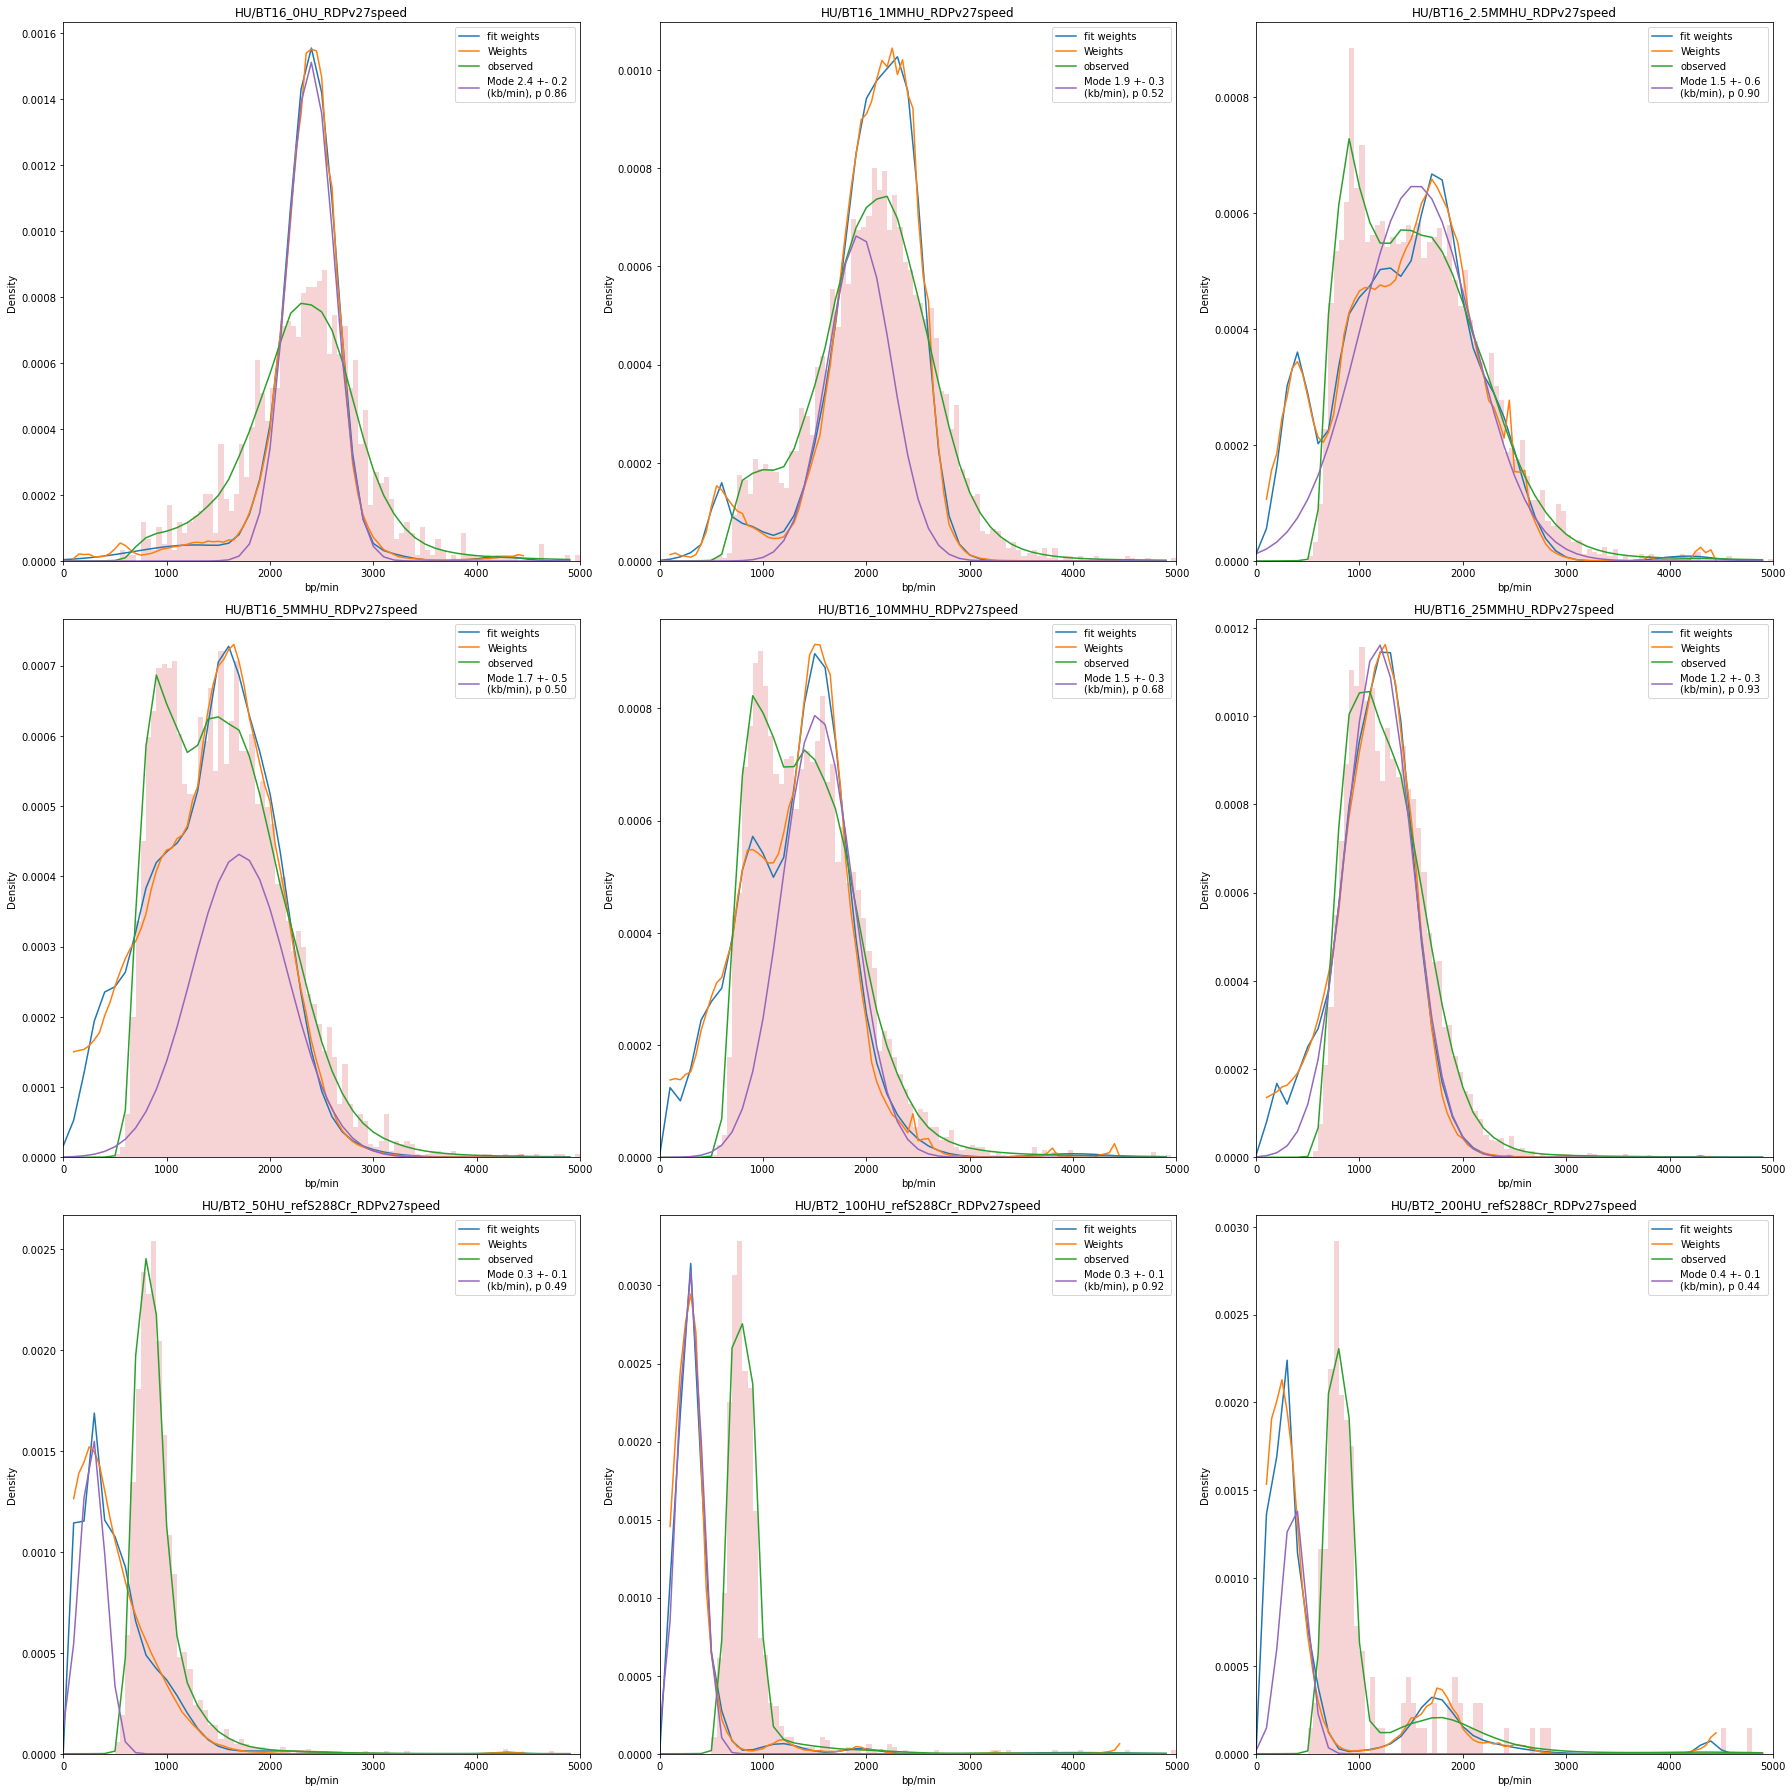

In [25]:
import pickle
fig=figure(figsize=(25,25))
i=1

sub_ordered=['../data/HU/BT16_0HU_RDPv27speed',
              '../data/HU/BT16_1MMHU_RDPv27speed',
             '../data/HU/BT16_2.5MMHU_RDPv27speed',
             '../data/HU/BT16_5MMHU_RDPv27speed',
      '../data/HU/BT16_10MMHU_RDPv27speed',
         '../data/HU/BT16_25MMHU_RDPv27speed',
              '../data/HU/BT2_50HU_refS288Cr_RDPv27speed',
             '../data/HU/BT2_100HU_refS288Cr_RDPv27speed',
     '../data/HU/BT2_200HU_refS288Cr_RDPv27speed']

sub_w = {k:weights_lists[k] for k in sub_ordered}
for expn,weights_list in sub_w.items():
    fig.add_subplot(3,3,i)
    i+=1
    #titleu =expn
    title(expn.replace("../data/",""))
    proba = []
    while proba ==[] or np.any(np.isnan(final.probability(centers))):
        proba=True
        drawed_th=np.random.choice(centers,size=10000,p=np.nanmean(weights_list,axis=0))

        final6=GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
                                        X=np.array(drawed_th)[:,np.newaxis]);
        with open(expn+"_distribution.pick","wb") as f:
            pickle.dump(final6.to_dict(),f)
        final=GeneralMixtureModel.from_samples(NormalDistribution, n_components=n_component_final,
                                        X=np.array(drawed_th)[:,np.newaxis]);
    #plot(r,final.probability(r),label="deconv (fit weights)")
    plot(r,final6.probability(r),label="fit weights")

    plot(centers,np.nanmean(weights_list,axis=0)/resolution_th_speed,label="Weights")
    plot(r,tofit50[expn].probability(r),label="observed")
    hist(exp_list[expn].speed,bins=100,range=[0,5000],density=True,alpha=0.2);

    xlabel("bp/min")
    ylabel("Density")
    weights_parameters=list(zip(np.exp(final.weights),final.to_dict()["distributions"]))
    weights_parameters.sort()
    for w,d in weights_parameters[::-1]:
        print(w,d["parameters"])
    mode_weight,mode_param=weights_parameters[-1]
    mode_param = mode_param["parameters"]
    plot(r,NormalDistribution(*mode_param).probability(r)*mode_weight,
         label=f"Mode {mode_param[0]/1000:.1f} +- {mode_param[1]/1000:.1f} \n(kb/min), p {mode_weight:.2f}")
    legend()
    xlim(0,5000)
fig.tight_layout()

In [23]:
[k for k in weights_lists.keys() if ("BT16" in k or "00HU" in k)]

['../data/HU/BT16_5MMHU_RDPv27speed',
 '../data/HU/BT2_50HU_refS288Cr_RDPv27speed',
 '../data/HU/BT16_2.5MMHU_RDPv27speed',
 '../data/HU/BT16_1MMHU_RDPv27speed',
 '../data/HU/FS_RDPv27speed',
 '../data/HU/JP3A_refS288Cr_RDPv27speed',
 '../data/HU/BT1_refS288Cr_RDPv27speed',
 '../data/HU/BT16_10MMHU_RDPv27speed',
 '../data/HU/BT12_BT1_RDPv27speed',
 '../data/HU/FR_RDPv27speed',
 '../data/HU/BT16_0HU_RDPv27speed',
 '../data/HU/BT15_BT1_RDPv27speed',
 '../data/HU/FU_RDPv27speed',
 '../data/HU/BT13_BT1_RDPv27speed',
 '../data/HU/FT_RDPv27speed',
 '../data/HU/BT16_25MMHU_RDPv27speed',
 '../data/HU/BT2_0HU_refS288Cr_RDPv27speed',
 '../data/HU/BT2_200HU_refS288Cr_RDPv27speed',
 '../data/HU/EW_refS288Cr_RDPv27speed',
 '../data/HU/BT2_100HU_refS288Cr_RDPv27speed',
 '../data/HU/BT2_25HU_refS288Cr_RDPv27speed',
 '../data/HU/FV_RDPv27speed',
 '../data/HU/DQ_refS288Cr_RDPv27speed',
 '../data/HU/BT14_BT1_RDPv27speed',
 '../data/HU/FK_refS288Cr_RDPv27speed',
 '../data/HU/BT10_100UM_RDPv27speed']

In [ ]:
raise

In [ ]:
plot(r,tofit.probability(r))
hist(exp.speed,bins=100,range=[0,5000],density=True);

In [ ]:
non_flat = GeneralMixtureModel.from_samples(NormalDistribution, n_components=8,
                                X=np.array(combined["spedd.rdp"])[:,np.newaxis],
                                        n_jobs=6)
hist(combined["spedd.rdp"],bins=100,range=[0,5000],density=True);
r=np.arange(0,5000)
plot(r,non_flat.probability(r[:,np.newaxis]))

In [ ]:
def draw_sample_according_to_dataset(original_sample,
                                    experimental_distribution,non_flat):
    
    # 1) fit distribution by multigaussian probably best

    rdp_speed=np.array([ori[0] for ori in original_sample])
    p = experimental_distribution.probability(rdp_speed[:,np.newaxis])
    ip = non_flat.probability(rdp_speed[:,np.newaxis])
    p/=ip
    p/=np.sum(p)
    rangex=np.arange(len(rdp_speed))
    new_distribution = np.random.choice(rangex,size=50000,p=p)
    deconvoluted = [original_sample[i][1] for i in new_distribution]
    drawed = [original_sample[i][0] for i in new_distribution]
    return deconvoluted, drawed
    #for exp in experimental_sample
u = 5000*np.random.uniform(size=10000)
ziped=list(zip(combined["spedd.rdp"],
                              combined["true_speed"]))
deconvoluted,drawed=draw_sample_according_to_dataset(ziped,init,non_flat)
print(len(deconvoluted))
hist(drawed,range=[0,6000],bins=100);
hist(deconvoluted,range=[0,6000],bins=100);

In [ ]:
def forward_draw(original_sample,speed_sample,sample_size=50000,delta=100):
    drawed=[]
    rdp_final=[]
    true_speed=np.array([ori[1] for ori in original_sample])
    rangex=np.arange(len(true_speed))
    if type(speed_sample)!=list:
        speed_sample = speed_sample.sample(sample_size)
    for sample in speed_sample:
        selected=(true_speed>sample-delta) & (true_speed<sample+delta)
        #print(np.sum(selected)
        if np.any(selected):
            which = np.random.choice(rangex[selected])
            drawed.append(original_sample[which][1])
            rdp_final.append(original_sample[which][0])

    return rdp_final, drawed
param=(-35.794751355749284, 2708.9600966905327, 494.3110214146591)
skew = stats.skewnorm(*param)

rdp_final,drawed=forward_draw(list(zip(combined["spedd.rdp"],
                              combined["true_speed"])),list(skew.rvs(40000)))

In [ ]:
list(zip(combined["spedd.rdp"],
                              combined["true_speed"]))[-3:]

In [ ]:
combined[["spedd.rdp","true_speed"]][-3:]

In [ ]:
r=np.arange(0,5000,100)
ran_skew = skew.pdf(r)
plot(r,ran_skew)
hist(drawed,range=[0,5000],bins=100,density=True);
plot([2700,2700],[0,0.007],label="True")

figure()
hist(rdp_final,range=[0,5000],bins=100,density=True,label="drawed rdp");
r=np.arange(0,5000)
plot(r,init.probability(r[:,np.newaxis]),label="Observed rdp")
legend()

In [ ]:
delta=100
#hist(rdp_final,range=[0,5000],bins=100,density=True,label="drawed rdp");
figure()
centers = list(range(100,4500,50))
probas = {}
r=list(range(0,5000,100))
for center in centers:
    sample=combined["spedd.rdp"][ (combined["true_speed"]<center+delta) & (combined["true_speed"]>center-delta) ]
    #hist(sample,range=[0,5000],bins=100,density=True);
    #init = GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
    #                                X=np.array(sample)[:,np.newaxis],
    #                                        n_jobs=1)
    #print(init.probability(r))
    #plot(init.probability(r))
    while center not in probas or np.any(np.isnan(probas[center].probability(r))):
        probas[center] = frozenGeneralMixtureModel(GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
                                    X=np.array(sample)[:,np.newaxis],
                                            n_jobs=1))
    #print(center)
    #if np.any(np.isnan(probas[center].probability(r))):
    #    hist(sample,range=[0,5000],bins=100,density=True);
    #    print(center)
    #    raise

In [ ]:
tofit50 = GeneralMixtureModel([probas[center] for center in centers])
tofit50.fit(np.array(exp.speed)[:,np.newaxis]);

In [ ]:
r=list(range(0,5000,10))
plot(r,tofit.probability(r))
hist(exp.speed,bins=100,range=[0,5000],density=True);
figure()
plot(list(range(100,4500,100)),np.exp(tofit.weights)/100,label="Deconvoluted100")
plot(list(range(100,4500,50)),np.exp(tofit50.weights)/50,label="Deconvoluted50")

param=(-35.794751355749284, 2708.9600966905327, 494.3110214146591)
skew = stats.skewnorm(*param).pdf(r)
normalf=stats.norm(loc=2500,scale=150).pdf(r)+0.35*stats.norm(loc=2000,scale=600).pdf(r)
plot(r,skew,label="skew")
plot(r,normalf/max(normalf)*0.0022,label="GM")

xlabel("bp/min")
legend()

In [ ]:
drawed_th=np.random.choice(list(range(100,4500,50)),size=10000,p=np.exp(tofit50.weights))
final=GeneralMixtureModel.from_samples(NormalDistribution, n_components=6,
                                    X=np.array(drawed_th)[:,np.newaxis]);
plot(r,final.probability(r),label="deconvolved")
plot(r,tofit.probability(r),label="observed")
legend()
xlabel("bp/min")
ylabel("Density")

In [ ]:
hist(drawed_th,bins=100,range=[0,5000],density=True);
plot(r,final.probability(r))
final.probability(r);
#print(final)

In [ ]:
final.to_dict()

In [ ]:
param=(-35.794751355749284, 2708.9600966905327, 494.3110214146591)
skew = stats.skewnorm(*param)
skew.rvs(10)

In [ ]:
def draw_sample_according_to_dataset(original_sample,
                                     experimental_distribution,
                                     delta=100):
    
    #print(original_sample)
    # 1) fit distribution by multigaussian probably best
    drawed=[]
    deconvoluted=[]
    rdp_speed=np.array([ori[0] for ori in original_sample])
    rangex=np.arange(len(rdp_speed))
    for sample in experimental_distribution:
        selected=(rdp_speed>sample-delta) & (rdp_speed<sample+delta)
        #print(np.sum(selected)
        if np.any(selected):
            which = np.random.choice(rangex[selected])
            drawed.append(original_sample[which][0])
            deconvoluted.append(original_sample[which][1])

    return deconvoluted, drawed

deconvoluted2,drawed=draw_sample_according_to_dataset(list(zip(combined["spedd.rdp"],
                              combined["true_speed"])),deconvoluted)

In [ ]:
hist(deconvoluted2,range=[0,6000],bins=100,density=True);
r=np.arange(0,5000)
plot(r,init.probability(r[:,np.newaxis]),label="Original")

In [ ]:
def draw_sample_according_to_dataset(original_sample,
                                     experimental_distribution,
                                     delta=100):
    
    #print(original_sample)
    # 1) fit distribution by multigaussian probably best
    drawed=[]
    deconvoluted=[]
    rdp_speed=np.array([ori[0] for ori in original_sample])
    rangex=np.arange(len(rdp_speed))
    for sample in experimental_distribution:
        selected=(rdp_speed>sample-delta) & (rdp_speed<sample+delta)
        #print(np.sum(selected)
        if np.any(selected):
            which = np.random.choice(rangex[selected])
            drawed.append(original_sample[which][0])
            weights.append(1/np.sum(selected))

            deconvoluted.append(original_sample[which][1])

    return deconvoluted, drawed
"""
def draw_sample_according_to_dataset(original_sample,
                                     init,
                                     delta=100):
    
    #print(original_sample)
    # 1) fit distribution by multigaussian probably best
    drawed=[]
    deconvoluted=[]
    weights=[]
    rdp_speed=np.array([ori[0] for ori in original_sample])
    rangex=np.arange(len(rdp_speed))
    range_speed=np.arange(100,5000,100)
    probas =init.probability(range_speed[:,np.newaxis])
    for selected_speed,proba in zip(range_speed,probas):
        selected=(rdp_speed>selected_speed-delta) & (rdp_speed<selected_speed+delta)
        #print(np.sum(selected)
        #if np.any(selected):
        #which = np.random.choice(rangex[selected])
        for  which in rangex[selected]:
            drawed.append(original_sample[which][0])
            weights.append(1/np.sum(selected) * proba)

            deconvoluted.append(original_sample[which][1])

    return deconvoluted, drawed,weights
"""
    #for exp in experimental_sample
sub = combined["spedd.rdp"]==2700
deconvoluted,drawed,weights=draw_sample_according_to_dataset(list(zip(combined["spedd.rdp"],
                              combined["true_speed"])),init)
print(len(drawed))

In [ ]:
weights;

In [ ]:
#hist(drawed,bins=100,range=[0,5000],density=True,alpha=0.7);
r=np.arange(0,5000)
plot(r,init.probability(r[:,np.newaxis]),label="Original")
hist(deconvoluted,bins=100,range=[0,6000],
     density=True,alpha=0.7,label="Deconvoluted",weights=weights);
param=(-35.794751355749284, 2708.9600966905327, 494.3110214146591)
skew = stats.skewnorm(*param).pdf(r)
plot(skew,label="Best so far")
plot([2500,2500],[0,0.002])
legend()